In [1]:
import pandas as pd
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

In [2]:
def string_to_numeric(d):
    d = d.replace(',','')
    return int(d)

In [3]:
df1 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (5).csv')
df2 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (6).csv')
df3 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (7).csv')
df4 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (8).csv')
df = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)
df

,년,월,광역지자체,순위,광역지자체(거주지),기초지자체(거주지),방문자수,구성비(%)
0,2019,1,대전광역시,1,대전광역시,서구,"2,631,706",18.18
1,2019,1,대전광역시,2,대전광역시,유성구,"1,814,610",12.54
2,2019,1,대전광역시,3,대전광역시,중구,"1,431,070",9.89
3,2019,1,대전광역시,4,대전광역시,동구,"1,428,840",9.87
4,2019,1,대전광역시,5,대전광역시,대덕구,"1,162,417",8.03
...,...,...,...,...,...,...,...,...
9855,2021,5,제주특별자치도,16,대구광역시,수성구,"69,920",0.92
9856,2021,5,제주특별자치도,17,서울특별시,동작구,"69,843",0.92
9857,2021,5,제주특별자치도,18,경기도,용인시 기흥구,"69,202",0.91
9858,2021,5,제주특별자치도,19,경기도,용인시 수지구,"67,977",0.89


In [4]:
df['방문자수'] = df[['방문자수']].applymap(string_to_numeric)
df['방문자수'].max()

80744132

In [10]:
df[(df['월']==2)].describe().to_dict()['방문자수']

{'count': 1020.0,
 'mean': 1254881.9588235293,
 'std': 4577322.256081228,
 'min': 10542.0,
 '25%': 134915.75,
 '50%': 335123.5,
 '75%': 1287144.75,
 'max': 63402770.0}

In [5]:
# 2월 기준 중위수
def create_color(d):
    value = d['value']
    if value < df[(df['월']==2)].describe().to_dict()['방문자수']['25%']:
        color = '#D4F1F4'
    elif value < df[(df['월']==2)].describe().to_dict()['방문자수']['50%']:
        color = '#75E6DA'
    elif value < df[(df['월']==2)].describe().to_dict()['방문자수']['75%']:
        color = '#189AB4'
    else:
        color= '#05445E'
    return color

### 2019, 2020, 2021년 2월 코로나 발생전, 후 , 백신 sankey

In [ ]:
layout = Layout(width="800", height="400")
links = []
year=2019
for idx, row in df[(df['년']==year)&(df['월']==2)].iterrows():
    source = row['광역지자체(거주지)']
    target = row['광역지자체']
    value = row['방문자수']

    tmp_dict = {'source': source, 'target':target, 'value': 0 }
    tmp_dict['value'] += value
    links.append(tmp_dict)
tmp_df = pd.DataFrame(links).groupby(['source','target']).sum()
tmp_df['color'] = tmp_df.apply(create_color, axis=1)
result_links1 = tmp_df.reset_index().to_dict('records')

w = SankeyWidget(layout=layout,links=result_links1, margins=dict(top=0, bottom=0, left=130, right=90))
w.auto_save_png('{}-02.png'.format(year))

In [ ]:
layout = Layout(width="800", height="400")
links = []
year=2020
for idx, row in df[(df['년']==year)&(df['월']==2)].iterrows():
    source = row['광역지자체(거주지)']
    target = row['광역지자체']
    value = row['방문자수']

    tmp_dict = {'source': source, 'target':target, 'value': 0 }
    tmp_dict['value'] += value
    links.append(tmp_dict)
tmp_df = pd.DataFrame(links).groupby(['source','target']).sum()
tmp_df['color'] = tmp_df.apply(create_color, axis=1)
result_links2 = tmp_df.reset_index().to_dict('records')

w = SankeyWidget(layout=layout,links=result_links2, margins=dict(top=0, bottom=0, left=130, right=90))
w.auto_save_png('{}-02.png'.format(year))

In [ ]:
layout = Layout(width="800", height="400")
links = []
year=2021
for idx, row in df[(df['년']==year)&(df['월']==2)].iterrows():
    source = row['광역지자체(거주지)']
    target = row['광역지자체']
    value = row['방문자수']

    tmp_dict = {'source': source, 'target':target, 'value': 0 }
    tmp_dict['value'] += value
    links.append(tmp_dict)
tmp_df = pd.DataFrame(links).groupby(['source','target']).sum()
tmp_df['color'] = tmp_df.apply(create_color, axis=1)
result_links3 = tmp_df.reset_index().to_dict('records')

w = SankeyWidget(layout=layout,links=result_links3, margins=dict(top=0, bottom=0, left=130, right=90))
w.auto_save_png('{}-02.png'.format(year))

In [11]:
%%html
<img src="2019-02.png" />
<img src="2020-02.png" />
<img src="2021-02.png" />

### 중위수별 값 카운트
- 2019, 2020, 2021 년 2월에 집계된 중위수 카운트
- 2019년 만큼은 아니더라도 방문자수가 2020년 대비 늚, 특히 3,4사분위수의 증가, 1분위수의 증가 -> 조금씩은 움직이는중

In [15]:
tmp1 = pd.DataFrame(result_links1)['color'].value_counts()
tmp2 = pd.DataFrame(result_links2)['color'].value_counts()
tmp3 = pd.DataFrame(result_links3)['color'].value_counts()
tmp = pd.concat([tmp1, tmp2, tmp3], axis=1)
tmp.columns = [2019, 2020, 2021]

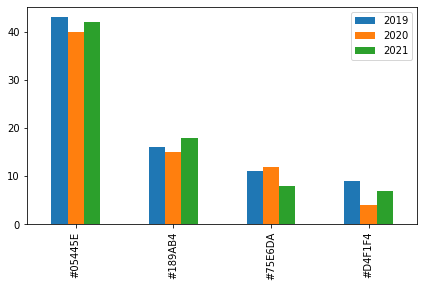

In [16]:
tmp.plot.bar(figsize=(7,4))